In [47]:
import rasterio
import numpy as np
from rasterio.crs import CRS
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import cm

from mpl_toolkits.axes_grid1.inset_locator import inset_axes 

In [26]:
forests_file = rasterio.open('Data/gm_ve_v1.tif')
forests = forests_file.read()

In [27]:
print(np.amin(forests))
print(np.amax(forests))
print(len(np.unique(forests)))

0
254
102


In [28]:
print(forests.min(), forests.max())

0 254


(np.float64(-0.5), np.float64(43199.5), np.float64(21599.5), np.float64(-0.5))

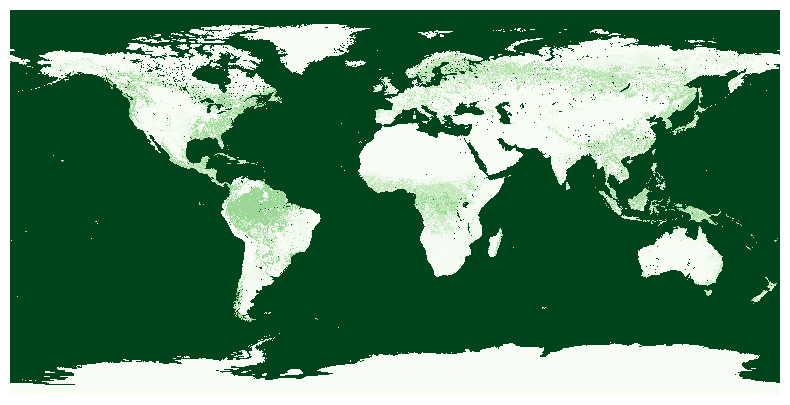

In [29]:
fig, ax = plt.subplots (figsize = (10,5))

imgs = plt.imshow(forests[0],
                  cmap='Greens',
                  interpolation='nearest')

ax.axis('off')

In [39]:
forests[0][forests[0] == 254] = 0.0

cmap = cm.get_cmap('Greens', 101)
newcolors = cmap(np.linspace(0, 1, 101))
background_colour = np.array([1.0, 1.0, 1.0, 1.0])
newcolors[:1, :] = background_colour
newcmp_forests = ListedColormap(newcolors)

C:\Users\User\AppData\Local\Temp\ipykernel_33956\2299815656.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Greens', 101)


In [40]:
#forests[forests > 100] = 0

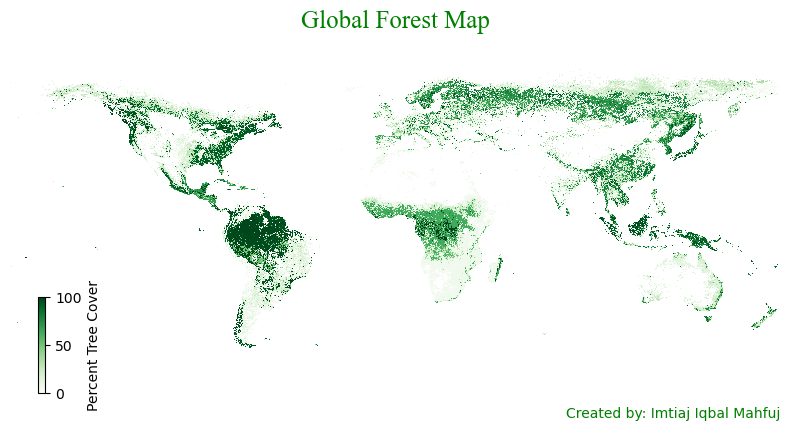

In [58]:
fig, ax = plt.subplots( figsize = (10,5), 
                      facecolor = 'white')

imgs = plt.imshow(forests[0],
                  cmap=newcmp_forests,
                  interpolation='nearest')

#plt.colorbar(label='Percent Tree Cover')
#ax.set_xlim(2000, 43500)
#ax.set_ylim(19500, 800)

ax.axis("off")

ax.set_title("Global Forest Map", fontsize = 18,
            color = "g", fontname="Times New Roman")

# Create an inset axes for the small colorbar (width 5% of map, height 25%)
cax = inset_axes(ax,
                 width="1%",  # width of colorbar
                 height="25%",  # height of colorbar
                 loc='lower left',  # position
                 borderpad=2)  # padding from map

# Add the colorbar
plt.colorbar(imgs, cax=cax, label='Percent Tree Cover')

# Add custom text at lower-right
ax.text(1.0, 0.0, "Created by: Imtiaj Iqbal Mahfuj",
        color='green', fontsize=10,
        ha='right', va='bottom',
        transform=ax.transAxes)  # coordinates relative to axes (0-1)

plt.savefig("Global forest map", dpi=300, bbox_inches = "tight")

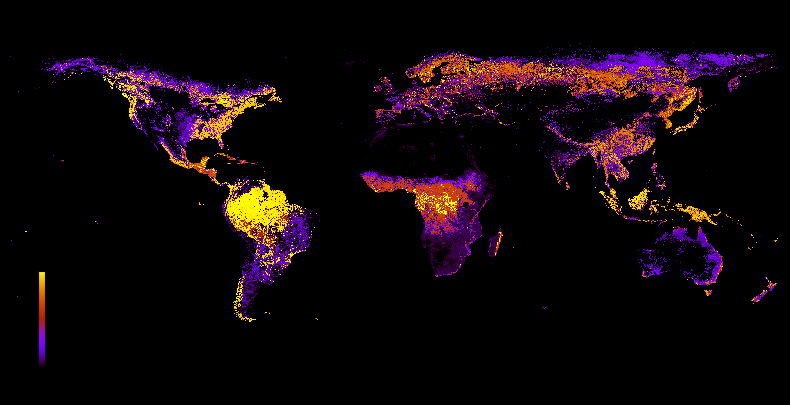

In [61]:
fig, ax = plt.subplots( figsize = (10,5), 
                      facecolor = 'k')

imgs = plt.imshow(forests[0],
                  cmap="gnuplot",
                  interpolation='nearest')

#plt.colorbar(label='Percent Tree Cover')
#ax.set_xlim(2000, 43500)
#ax.set_ylim(19500, 800)

ax.axis("off")

#ax.set_title("Global Forest Map", fontsize = 18, color = "g")

# Create an inset axes for the small colorbar (width 5% of map, height 25%)
cax = inset_axes(ax,
                 width="1%",  # width of colorbar
                 height="25%",  # height of colorbar
                 loc='lower left',  # position
                 borderpad=2)  # padding from map

# Add the colorbar
plt.colorbar(imgs, cax=cax, label='Percent Tree Cover')

# Add custom text at lower-right
#ax.text(1.0, 0.0, "Created by: Imtiaj Iqbal Mahfuj",
#        color='green', fontsize=10,
#        ha='right', va='bottom',
#        transform=ax.transAxes)  # coordinates relative to axes (0-1)

plt.savefig("Global forest map gnuplot", dpi=300, bbox_inches = "tight")